In this notebook,our goal is to study the BCM related objective function and local learning rule on various datasets.

In [9]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from time import time
import seaborn as sns
import pandas as pd
import BCM
import data_loader
% matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


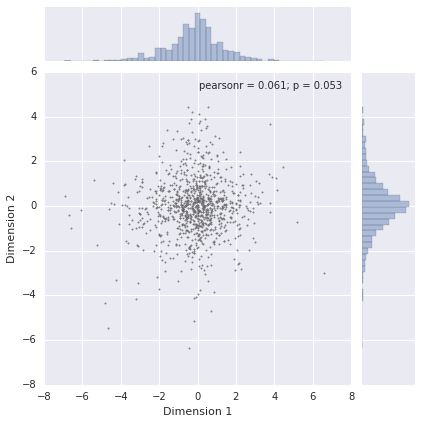

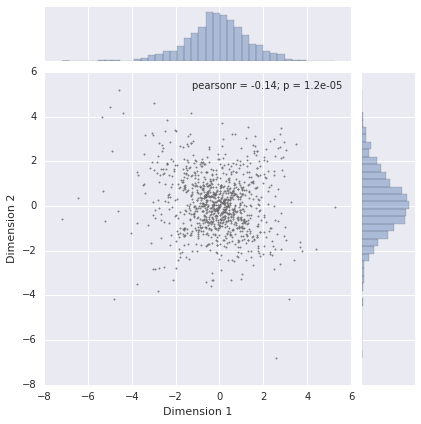

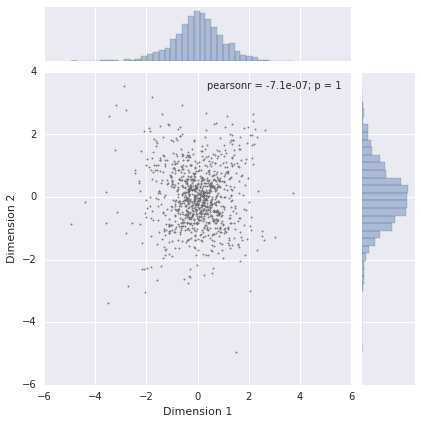

In [10]:
# Load laplace data with 45 degree rotation
Laplace_rt_wt,Laplace_w = data_loader.load_laplace(loc = 0, scale = 1, sample_size = 1000,dimension = 2,skew = False, whiten = True, rotation = True)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


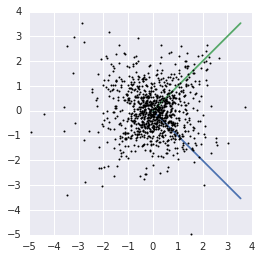

In [11]:
# Check orignal dimension
print(Laplace_w)
plt.figure()
w_tmp = Laplace_w
w_tmp = w_tmp * 5
plt.plot([0,w_tmp[0][0]],[0,w_tmp[0][1]])
plt.plot([0,w_tmp[1][0]],[0,w_tmp[1][1]])
plt.plot(Laplace_rt_wt[:,0],Laplace_rt_wt[:,1],'.k', ms=4)
plt.gca().set_aspect(1)

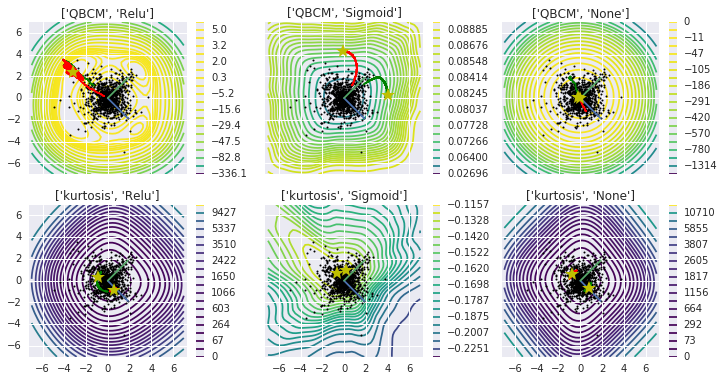

In [12]:
# Contruct objective function and 2D contour 
# Track the weight update trajectory
# Plot the trained weights on top
# Generate the objective function landscape

w_min = -7
w_max = 7
reso = 50

p = 2
ny = 2 
tau = 200
batch = 1

n_epoch = np.array([40,400,200,100,100,100])
decay = np.array([0.01,0.01,0.05,0.05,0.05,0.05])
eta = np.array([0.0005,0.01,0.001,0.0005,0.00005,0.0005])

para = [p,ny,tau,batch,n_epoch,decay,eta]

BCM.bcm_obj(Laplace_rt_wt,w_min,w_max,reso,para,obj_select = None, nonlinear_select = None, ori_w = Laplace_w)

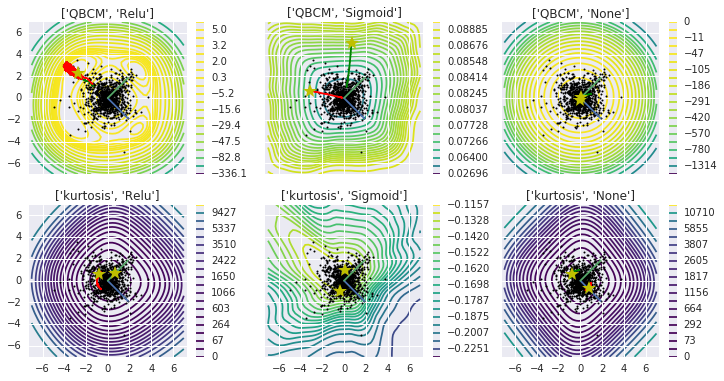

In [13]:
# Contruct objective function and 2D contour 
# Track the weight update trajectory
# Plot the trained weights on top
# Generate the objective function landscape

w_min = -7
w_max = 7
reso = 50

p = 2
ny = 2 
tau = 200
batch = 1

n_epoch = np.array([40,20,40,200,200,100])
decay = np.zeros(6)
eta = np.array([0.0005,0.005,0.0005,0.0005,0.00005,0.0005])

para = [p,ny,tau,batch,n_epoch,decay,eta]

BCM.bcm_obj(Laplace_rt_wt,w_min,w_max,reso,para,obj_select = None, nonlinear_select = None, ori_w = Laplace_w)

[[ 1.  0.]
 [ 0.  1.]]


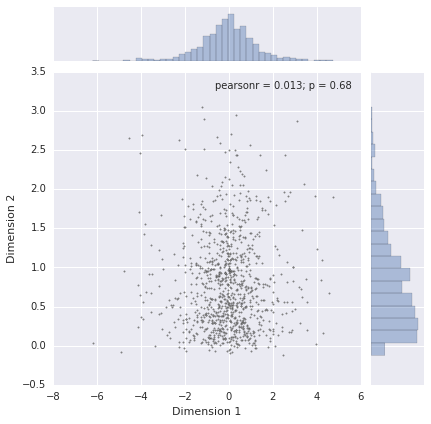

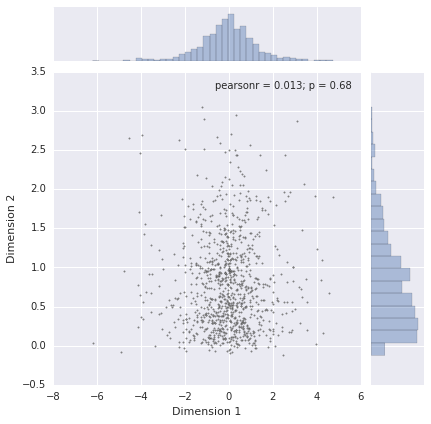

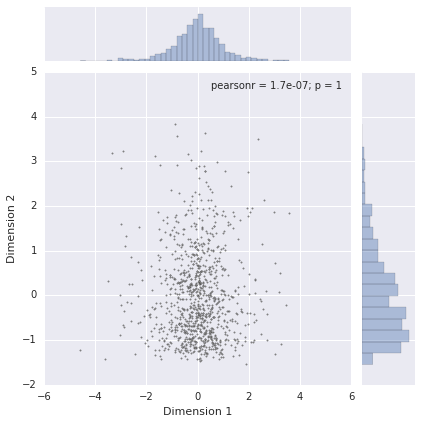

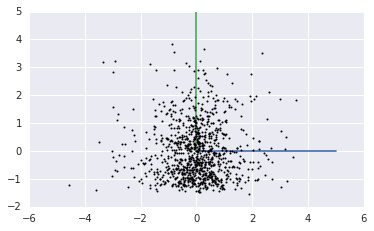

In [14]:
# Skewned laplace data 
Laplace_rt_wt,Laplace_w = data_loader.load_laplace(loc = 0, scale = 1, sample_size = 1000,dimension = 2,skew = True, whiten = True, rotation = False, Affine = False)
# Check orignal dimension
print(Laplace_w)
plt.figure()
w_tmp = Laplace_w
w_tmp = w_tmp * 5
plt.plot([0,w_tmp[0][0]],[0,w_tmp[0][1]])
plt.plot([0,w_tmp[1][0]],[0,w_tmp[1][1]])
plt.plot(Laplace_rt_wt[:,0],Laplace_rt_wt[:,1],'.k', ms=4)
plt.gca().set_aspect(1)

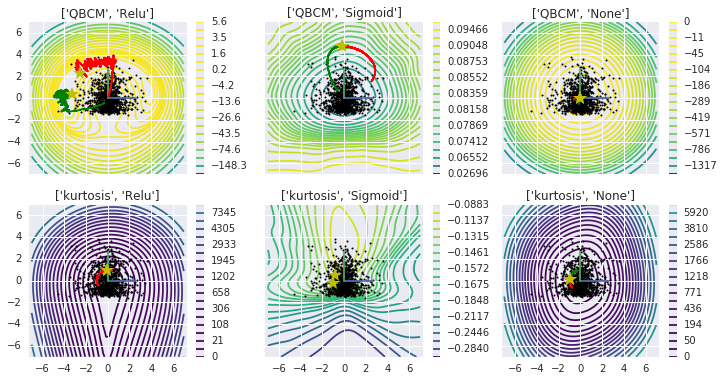

In [15]:
# Objective function landscape and training results for skewed data

w_min = -7
w_max = 7
reso = 50

p = 2
ny = 2 
tau = 200
batch = 1

n_epoch = np.array([40,400,200,400,400,100])
decay = np.array([0.01,0.01,0.05,0.05,0.05,0.005])
eta = np.array([0.0005,0.005,0.001,0.0005,0.00005,0.0005])

para = [p,ny,tau,batch,n_epoch,decay,eta]

BCM.bcm_obj(Laplace_rt_wt,w_min,w_max,reso,para,obj_select = None, nonlinear_select = None, ori_w = Laplace_w)

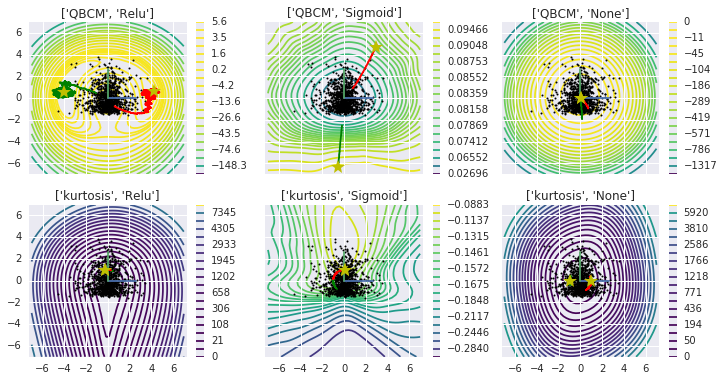

In [16]:
# Objective function landscape and training results for skewed data

w_min = -7
w_max = 7
reso = 50

p = 2
ny = 2 
tau = 200
batch = 1

n_epoch = np.array([200,20,100,100,100,100])
decay = np.zeros(6)
eta = np.array([0.0005,0.005,0.0005,0.00005,0.05,0.0005])

para = [p,ny,tau,batch,n_epoch,decay,eta]

BCM.bcm_obj(Laplace_rt_wt,w_min,w_max,reso,para,obj_select = None, nonlinear_select = None, ori_w = Laplace_w)

[[-0.09215999  0.4584071 ]
 [-0.27618006 -0.39458775]]


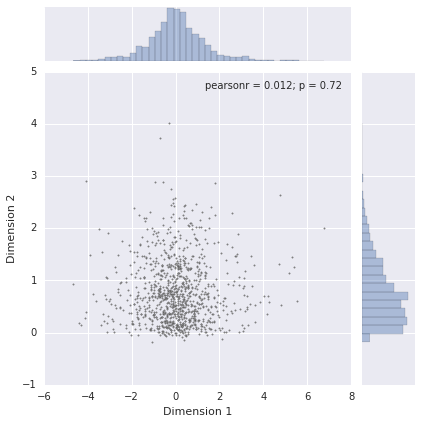

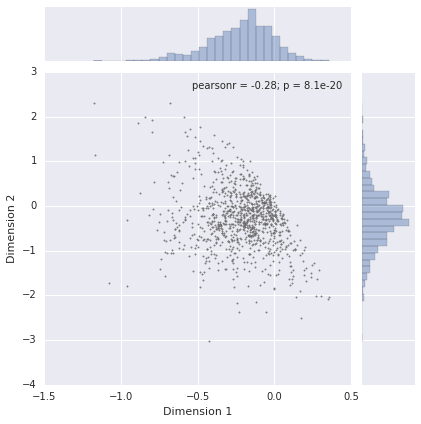

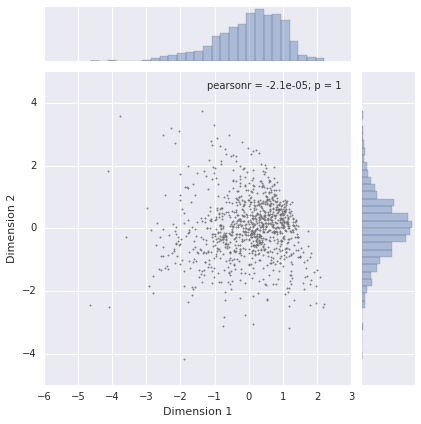

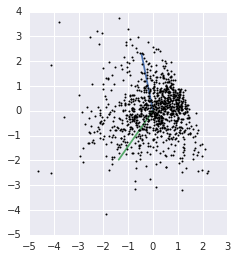

In [17]:
# Skewned affine transformed laplace data 
Laplace_rt_wt,Laplace_w = data_loader.load_laplace(loc = 0, scale = 1, sample_size = 1000,dimension = 2,skew = True, whiten = True, rotation = False, Affine = True)
# Check orignal dimension
print(Laplace_w)
plt.figure()
w_tmp = Laplace_w
w_tmp = w_tmp * 5
plt.plot([0,w_tmp[0][0]],[0,w_tmp[0][1]])
plt.plot([0,w_tmp[1][0]],[0,w_tmp[1][1]])
plt.plot(Laplace_rt_wt[:,0],Laplace_rt_wt[:,1],'.k', ms=4)
plt.gca().set_aspect(1)

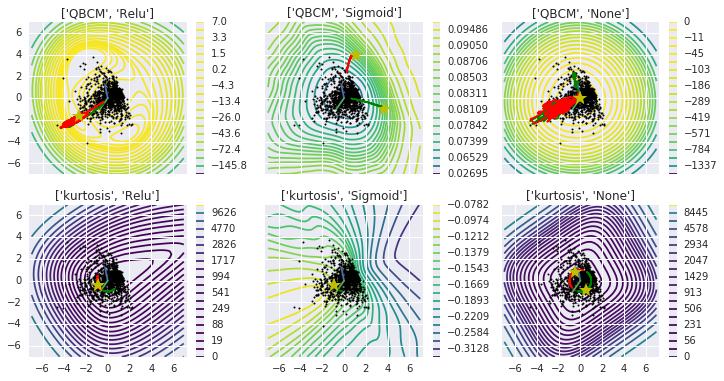

In [18]:
# Objective function landscape and training results for skewed data

w_min = -7
w_max = 7
reso = 50

p = 2
ny = 2 
tau = 200
batch = 1

n_epoch = np.array([200,250,100,100,150,100])
decay = np.array([0.005,0.01,0.005,0.05,0.00005,0.0005])
eta = np.array([0.0005,0.01,0.005,0.001,0.005,0.001])

para = [p,ny,tau,batch,n_epoch,decay,eta]

BCM.bcm_obj(Laplace_rt_wt,w_min,w_max,reso,para,obj_select = None, nonlinear_select = None, ori_w = Laplace_w)

Extracting the top 2 eigendigits from 150 faces
done in 0.002s


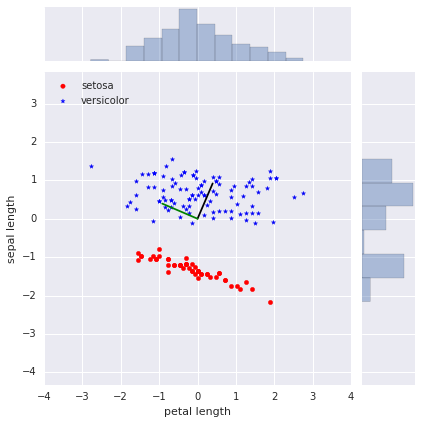

In [19]:
# Load Iris data
Iris_rt_wt, g = data_loader.load_Iris()

# PCA on the Iris data

from sklearn.decomposition import RandomizedPCA

# Compute the PCA (eigendigits) on the digits
n_components = 2

print("Extracting the top %d eigendigits from %d faces" % (n_components,Iris_rt_wt.shape[0]))
t0 = time()
pca = RandomizedPCA(n_components = n_components, whiten = False).fit(Iris_rt_wt)
print("done in %0.3fs" % (time()-t0))

w_pca= pca.components_
ax = g.ax_joint
ax.plot([0,w_pca[0][0]],[0,w_pca[0][1]],'k')
ax.plot([0,w_pca[1][0]],[0,w_pca[1][1]],'g')
ax.set_aspect(1)


[[ 2.96503099  2.96212708]
 [ 1.07672142  1.08453171]]
done in 2.349s


array([[ 2.96503099,  2.96212708],
       [ 1.07672142,  1.08453171]])

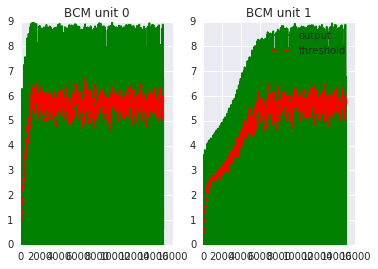

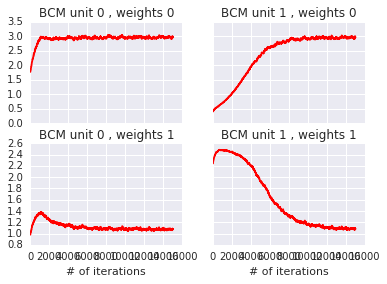

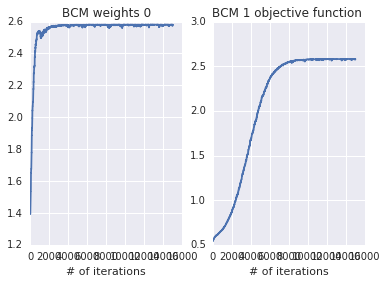

In [20]:
# Train BCM model with Skewed laplace data

ny = 2    # 2 output neurons
p = 2
tau = 200
batch = 1

nonlinear = 'Relu'
obj_type = 'QBCM'
n_epoch = 100
decay = 0.01
eta = 0.0005

# nonlinear = 'Sigmoid'
# obj_type = 'QBCM'
# n_epoch = 250
# decay = 0.005
# eta = 0.01

# nonlinear = 'None'
# obj_type = 'QBCM'
# n_epoch = 100
# decay = 0.005
# eta = 0.0005

# nonlinear = 'Relu'
# obj_type = 'kurtosis'
# n_epoch = 40
# decay = 0.05
# eta = 0.0005

# nonlinear = 'Sigmoid'
# obj_type = 'kurtosis'
# n_epoch = 100
# decay = 0.005
# eta = 0.005

# nonlinear = 'None'
# obj_type = 'kurtosis'
# n_epoch = 150
# decay = 0.05
# eta = 0.0001


BCM_laplace = BCM.bcm_train(np.float64(Iris_rt_wt),eta = eta, n_epoch = n_epoch, batch = batch , ny = ny,tau = tau, thres = 0, p = p, seed = 0, random_state = 10, nonlinear = nonlinear, obj_type = obj_type,decay = decay)
BCM_laplace.w_

Extracting the top 2 icadigits from 150 faces
done in 0.020s


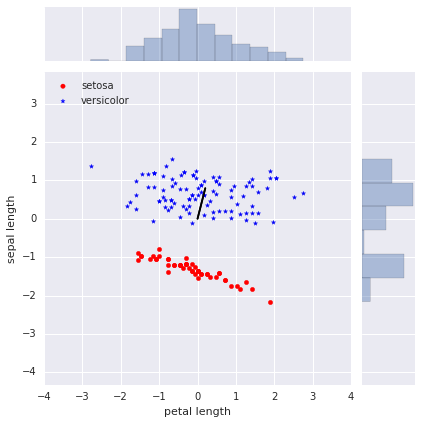

In [22]:
# Load Iris data
Iris_rt_wt, g = data_loader.load_Iris()
# ICA on Iris data
from sklearn.decomposition import FastICA

# Compute the ICA (eigendigits) on the digits
n_components = 2

print("Extracting the top %d icadigits from %d faces" % (n_components,Iris_rt_wt.shape[0]))
t0 = time()
ica = FastICA(n_components = n_components, whiten = True).fit(Iris_rt_wt)
print("done in %0.3fs" % (time()-t0))
ax = g.ax_joint

w_ica = ica.components_*10
plt.plot([0,w_ica [0][0]],[0,w_ica [0][1]],'k')
plt.plot([0,w_ica [0][0]],[0,w_ica [0][1]],'k')

ax.set_aspect(1)

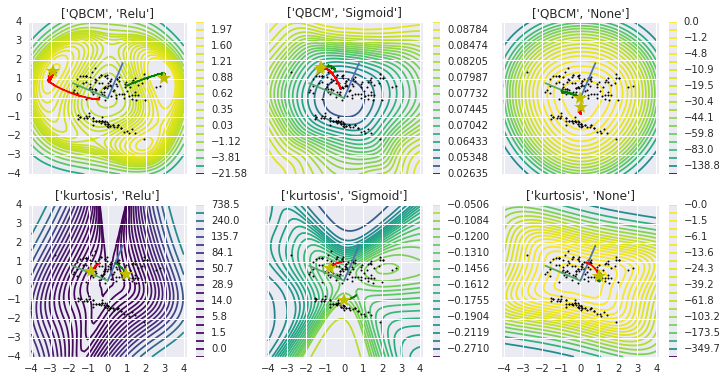

In [23]:
# Objective function landscape and training results for Iris data with non-zero decay term

w_min = -4
w_max = 4
reso = 50

p = 2
ny = 2
tau = 200
batch = 1

n_epoch = np.array([200,200,200,100,100,200])
decay = np.array([0.005,0.02,0.005,0.05,0.005,0.05])
eta = np.array([0.0005,0.01,0.005,0.0005,0.005,0.001])

para = [p,ny,tau,batch,n_epoch,decay,eta]

BCM.bcm_obj(Iris_rt_wt,w_min,w_max,reso,para,obj_select = None, nonlinear_select = None, ori_w = w_pca)

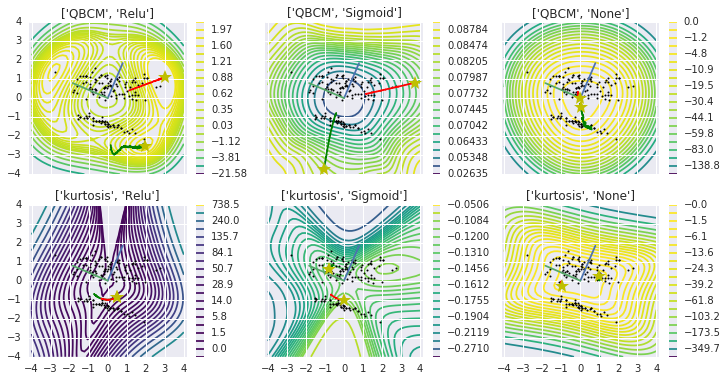

In [33]:
# Objective function landscape and training results for Iris data with zero decay term

w_min = -4
w_max = 4
reso = 50

p = 2
ny = 2 
tau = 200
batch = 1

n_epoch = np.array([200,40,200,100,100,200])
decay = np.zeros(6)
eta = np.array([0.0005,0.01,0.005,0.0005,0.005,0.001])

para = [p,ny,tau,batch,n_epoch,decay,eta]

BCM.bcm_obj(Iris_rt_wt,w_min,w_max,reso,para,obj_select = None, nonlinear_select = None, ori_w = w_pca)

Extracting the top 1 icadigits from 150 faces
done in 0.001s


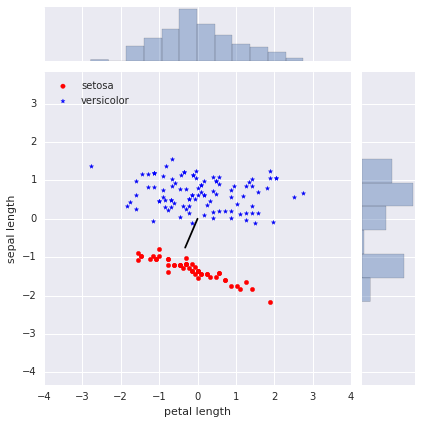

In [8]:
# Load Iris data
Iris_rt_wt, g = data_loader.load_Iris()
# ICA on Iris data
from sklearn.decomposition import FastICA

# Compute the ICA (eigendigits) on the digits
n_components = 1

print("Extracting the top %d icadigits from %d faces" % (n_components,Iris_rt_wt.shape[0]))
t0 = time()
ica = FastICA(n_components = n_components, whiten = True).fit(Iris_rt_wt)
print("done in %0.3fs" % (time()-t0))
ax = g.ax_joint


w_ica = ica.components_*10
plt.plot([0,w_ica [0][0]],[0,w_ica [0][1]],'k')
ax.set_aspect(1)

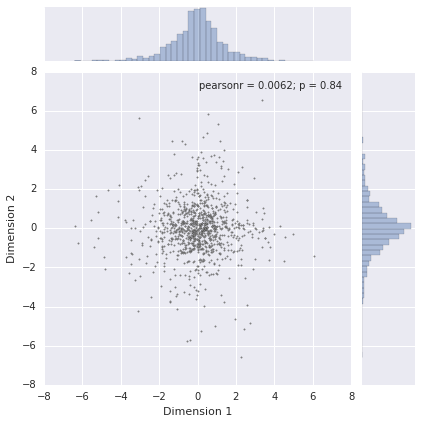

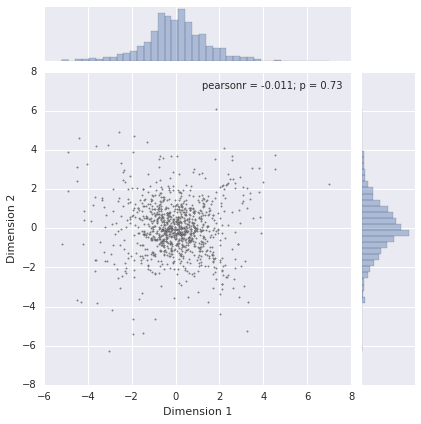

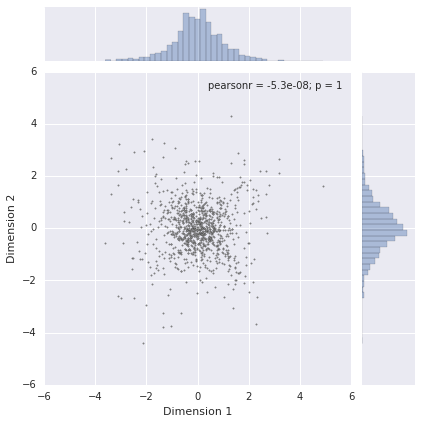

In [4]:
# Load laplace data with 45 degree rotation
Laplace_rt_wt,Laplace_w = data_loader.load_laplace(loc = 0, scale = 1, sample_size = 1000,dimension = 2,skew = False, whiten = True, rotation = True)


In [94]:
# Generate symmetric data

index = np.sum(Laplace_rt_wt < 0, axis = 1)
sample = Laplace_rt_wt[index == 0]
sample2 = Laplace_rt_wt[index == 0]
sample2[:,0] = -sample2[:,0]
sample_joint = np.concatenate((sample,sample2),axis = 0)
sample_joint2 = np.concatenate((sample,sample2),axis = 0)
sample_joint2[:,1] = -sample_joint2[:,1]
Laplace_rt_wt = np.concatenate((sample_joint,sample_joint2),axis = 0)
plt.scatter(Laplace_rt_wt [:,0],Laplace_rt_wt [:,1])

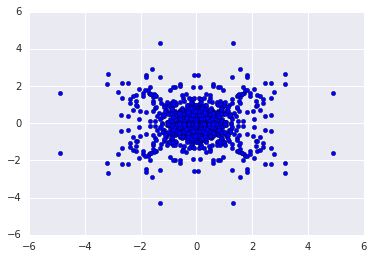

In [103]:
sample_joint = np.concatenate((sample,sample2),axis = 0)
sample_joint2 = np.concatenate((sample,sample2),axis = 0)
sample_joint2[:,1] = -sample_joint2[:,1]
Laplace_rt_wt = np.concatenate((sample_joint,sample_joint2),axis = 0)
plt.scatter(Laplace_rt_wt [:,0],Laplace_rt_wt [:,1])

In [ ]:
# Contruct objective function and 2D contour 
# Track the weight update trajectory
# Plot the trained weights on top
# Generate the objective function landscape

w_min = -7
w_max = 7
reso = 50

p = 2
ny = 2 
tau = 200
batch = 1

n_epoch = np.array([40,400,200,100,100,100])
decay = np.array([0.01,0.01,0.05,0.05,0.05,0.05])
eta = np.array([0.0005,0.01,0.001,0.0005,0.00005,0.0005])

para = [p,ny,tau,batch,n_epoch,decay,eta]

BCM.bcm_obj(Laplace_rt_wt,w_min,w_max,reso,para,obj_select = None, nonlinear_select = None, ori_w = Laplace_w)